In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
os.listdir('/kaggle/input/weather-dataset-rattle-package')

['weatherAUS.csv']

In [4]:
df = pd.read_csv('/kaggle/input/weather-dataset-rattle-package/weatherAUS.csv')

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [6]:
df.shape

(145460, 23)

<AxesSubplot:>

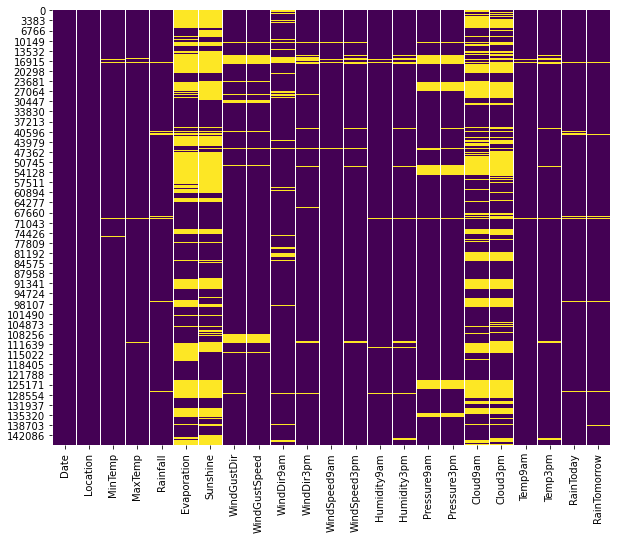

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna(),cmap='viridis',cbar=False)

<AxesSubplot:>

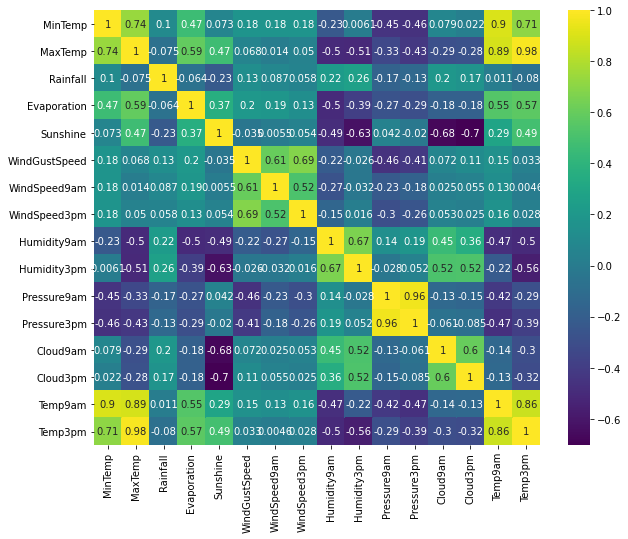

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

In [9]:
feature_with_na = [feature for feature in df.columns if df[feature].isnull().sum()>1] 

In [10]:
for feature in feature_with_na:
    print(feature,np.round(df[feature].isnull().mean()*100,4), '% missing values')

MinTemp 1.0209 % missing values
MaxTemp 0.8669 % missing values
Rainfall 2.2419 % missing values
Evaporation 43.1665 % missing values
Sunshine 48.0098 % missing values
WindGustDir 7.0989 % missing values
WindGustSpeed 7.0555 % missing values
WindDir9am 7.2639 % missing values
WindDir3pm 2.9066 % missing values
WindSpeed9am 1.2148 % missing values
WindSpeed3pm 2.105 % missing values
Humidity9am 1.8246 % missing values
Humidity3pm 3.0984 % missing values
Pressure9am 10.3568 % missing values
Pressure3pm 10.3314 % missing values
Cloud9am 38.4216 % missing values
Cloud3pm 40.8071 % missing values
Temp9am 1.2148 % missing values
Temp3pm 2.4811 % missing values
RainToday 2.2419 % missing values
RainTomorrow 2.246 % missing values


In [11]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [12]:
df['RainTomorrow'] = df['RainTomorrow'].replace('No',0)

In [13]:
df['RainTomorrow'] = df['RainTomorrow'].replace('Yes',1)

In [14]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,0.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.0


### Missing Features ar importnat or not

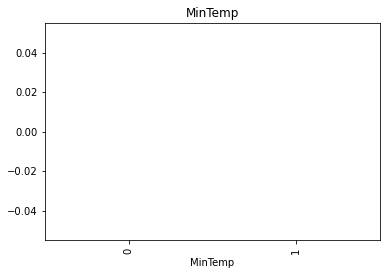

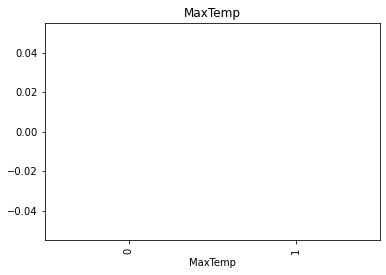

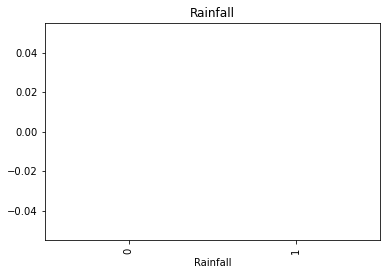

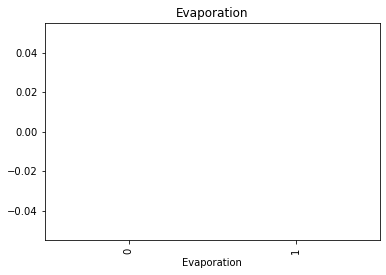

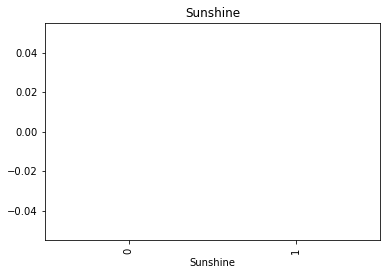

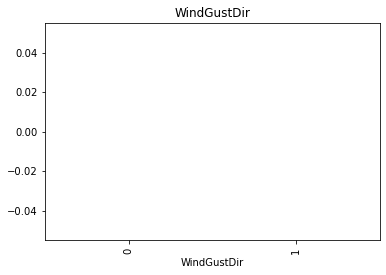

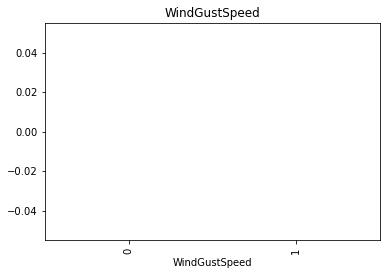

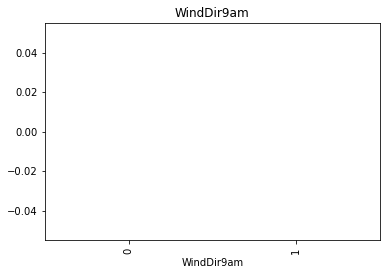

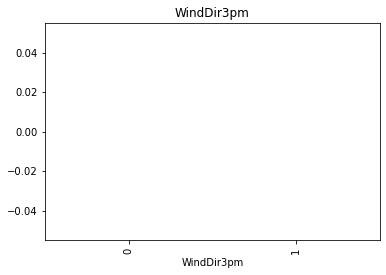

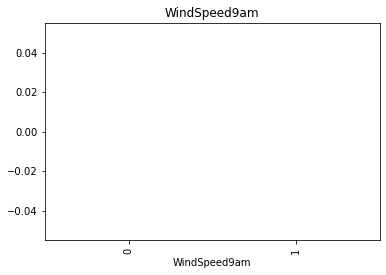

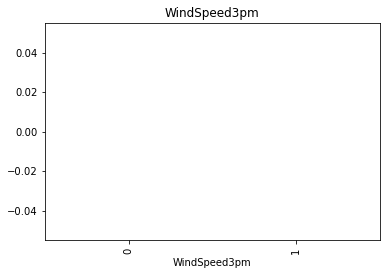

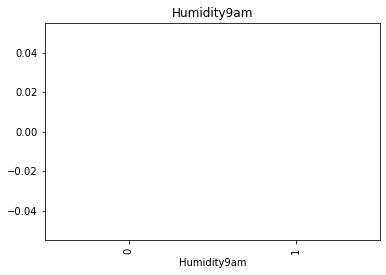

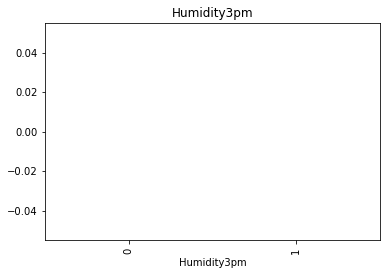

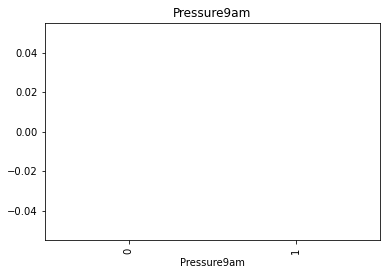

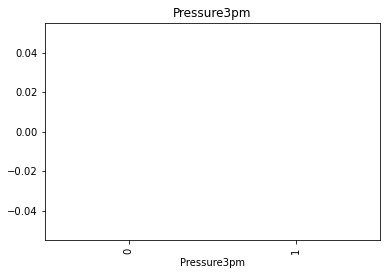

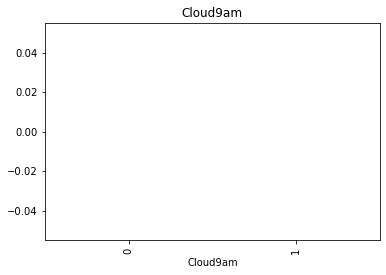

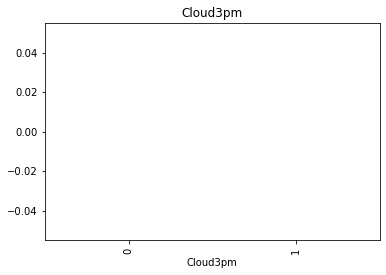

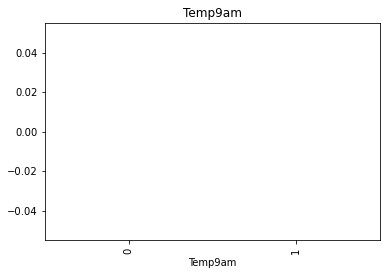

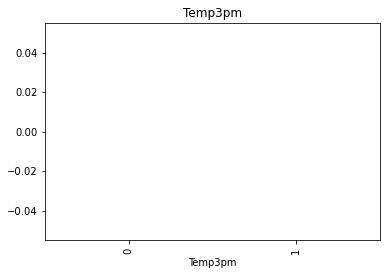

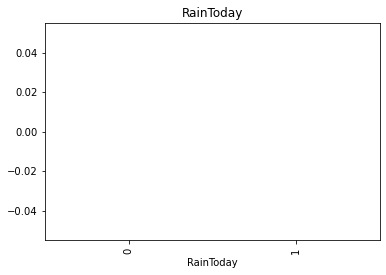

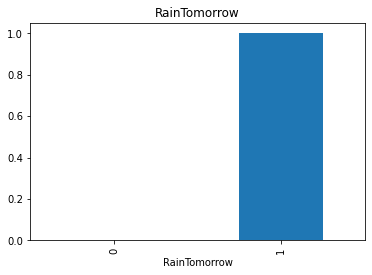

In [15]:
for feature in feature_with_na:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['RainTomorrow'].median().plot.bar()
    plt.title(feature)
    plt.show()

### How many features are numeric feature

In [16]:
numeric_feature = [feature for feature in df.columns if df[feature].dtype!='O']

In [17]:
print('Number of numerical feature : ',len(numeric_feature))
df[numeric_feature].head()

Number of numerical feature :  17


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0


### Find Discrete Variable

In [18]:
discrete_feature = [feature for feature in numeric_feature if len(df[feature].unique()) < 25]

In [19]:
print('Discrete Feature count  : {} '.format(len(discrete_feature)))

Discrete Feature count  : 3 


In [20]:
discrete_feature

['Cloud9am', 'Cloud3pm', 'RainTomorrow']

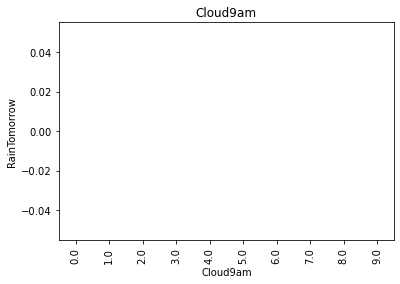

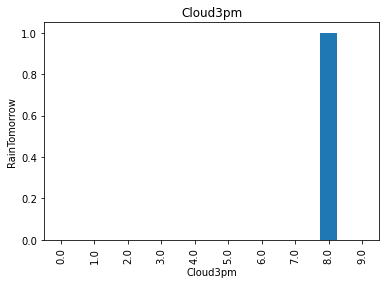

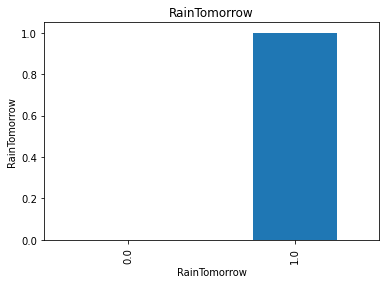

In [21]:
for feature in discrete_feature:
    data = df.copy()
    data.groupby(feature)['RainTomorrow'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('RainTomorrow')
    plt.title(feature)
    plt.show()

In [22]:
contineous_feature = [feature for feature in numeric_feature if feature not in discrete_feature]

In [23]:
print('Count of contineous feature are {}'.format(len(contineous_feature)))

Count of contineous feature are 14


In [24]:
contineous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

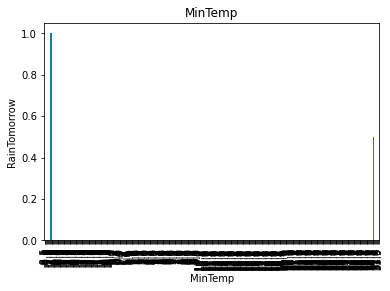

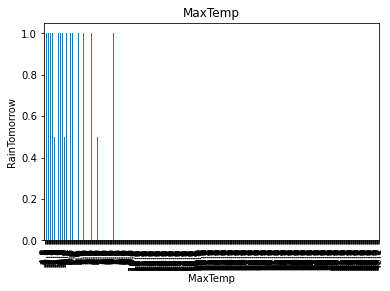

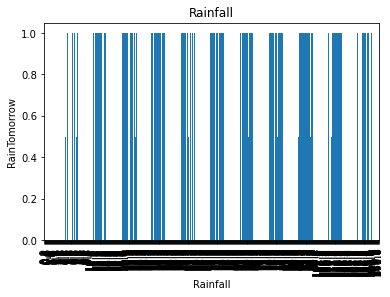

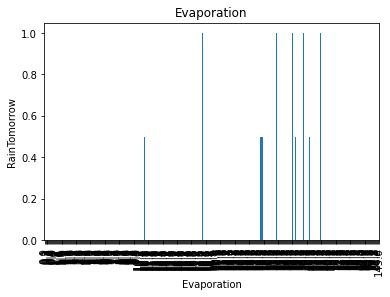

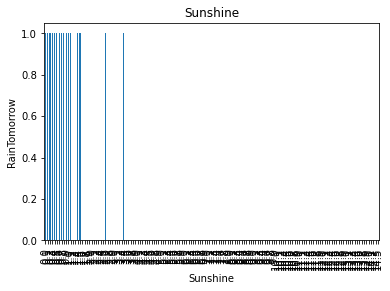

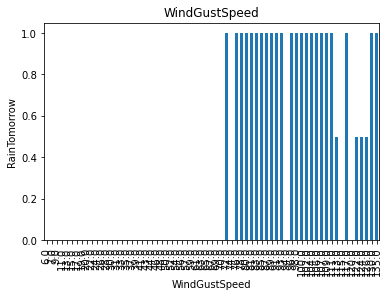

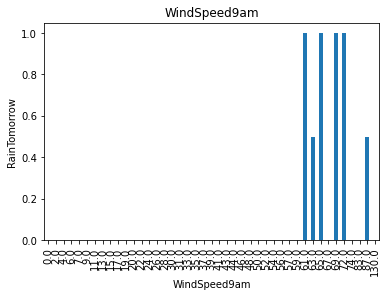

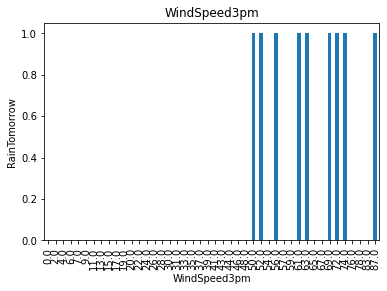

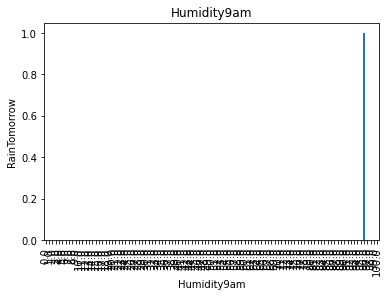

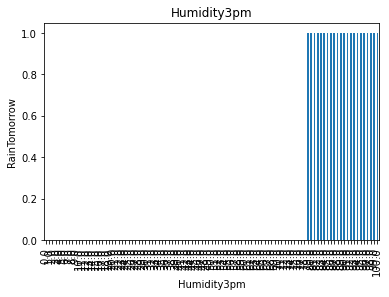

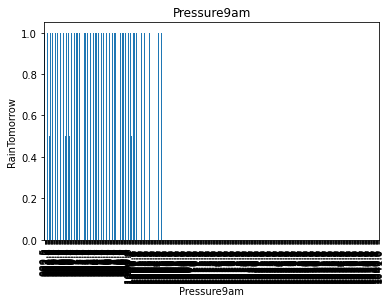

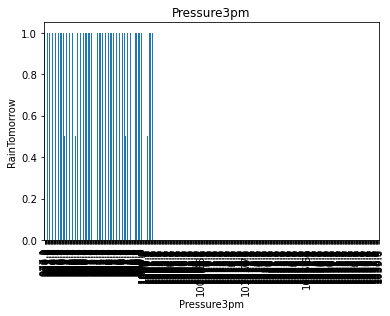

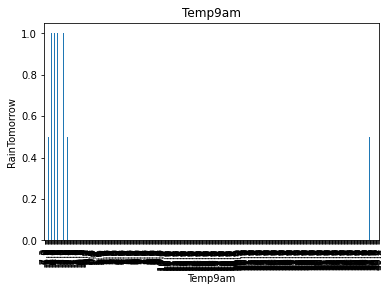

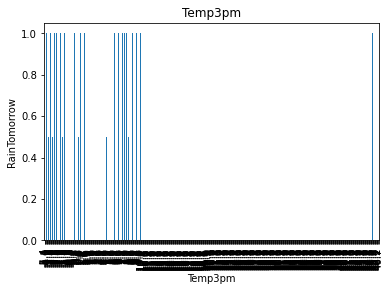

In [25]:
for feature in contineous_feature:
    data = df.copy()
    data.groupby(feature)['RainTomorrow'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('RainTomorrow')
    plt.title(feature)
    plt.show()

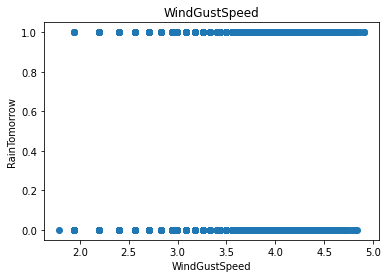

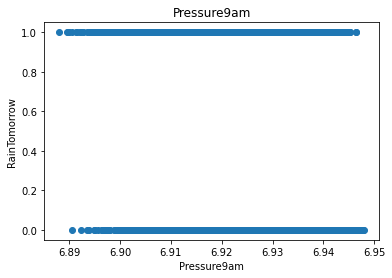

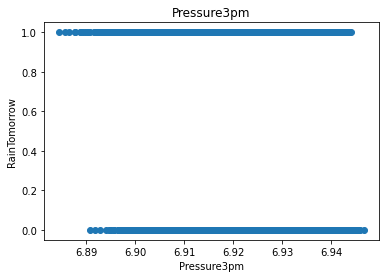

In [26]:
for feature in contineous_feature:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        #data[feature]=np.log(data['RainTomorrow'])
        plt.scatter(data[feature],data['RainTomorrow'])
        plt.xlabel(feature)
        plt.ylabel('RainTomorrow')
        plt.title(feature)
        plt.show()

In [27]:
df = df.drop('Date',axis=1)

### Get all Categorical Features

In [28]:
categorical_feature = [feature for feature in df.columns if df[feature].dtype=='O']

In [29]:
print(categorical_feature)

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']


### Fill all missing values with a new label 'Missing'

In [30]:
def replace_cat_nan(dataset,feature_nan):
    data=df.copy()
    data[feature_nan] = data[feature_nan].fillna('Missing')
    return data

In [31]:
df = replace_cat_nan(df,categorical_feature)

In [32]:
df[categorical_feature].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [33]:
df[categorical_feature].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

### Fill all numerical value with Median

In [34]:
for feature in numeric_feature:
    median_value = df[feature].median()
    #df[feature + "Nan"] = np.where(df[feature].isnull()1,0)
    df[feature].fillna(median_value,inplace=True)
    
df[numeric_feature].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainTomorrow     0
dtype: int64

<AxesSubplot:>

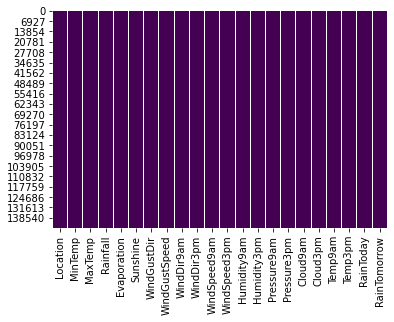

In [35]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [36]:
feature_with_na_values = [feature for feature in df.columns if df[feature].isnull().sum()>1] 

In [37]:
for feature in feature_with_na_values:
    print(feature,np.round(df[feature].isnull().mean()*100,4), '% missing values')

In [38]:
print(feature_with_na_values)

[]


In [39]:
for feature in categorical_feature:
    labels_ordered = df.groupby([feature])['RainTomorrow'].mean().sort_values().index
    labels_ordered = {k:i for i,k in enumerate(labels_ordered,0)}
    df[feature] = df[feature].map(labels_ordered)

In [40]:
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [43]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [44]:
feature_for_model = SelectFromModel(Lasso(alpha=0.05,random_state=0))
feature_for_model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.05, random_state=0))

In [45]:
feature_for_model.get_support()

array([ True, False, False,  True, False,  True, False,  True, False,
        True, False,  True, False,  True, False,  True, False, False,
       False, False, False])

In [46]:
X.columns

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday'],
      dtype='object')

In [47]:
X = df[['Location','Rainfall','Sunshine','WindGustSpeed','WindDir3pm','WindSpeed3pm','Humidity3pm','Pressure3pm']]

In [48]:
y = df['RainTomorrow']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression()

In [52]:
model.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred=model.predict(X_test)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix

In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.95      0.90     33987
         1.0       0.72      0.45      0.55      9651

    accuracy                           0.84     43638
   macro avg       0.79      0.70      0.73     43638
weighted avg       0.83      0.84      0.82     43638



In [56]:
print(confusion_matrix(y_test,y_pred))

[[32338  1649]
 [ 5344  4307]]
